In [ ]:
'''Chatgpt LINK:https://chatgpt.com/share/67c974ea-6540-8003-bc40-8a2abae4657a'''

In [ ]:
'''    1. Implement thickening to enhance blood vessels in X-ray angiograms.
    • Extract initial vessel structure using edge detection.
    • Apply morphological thickening iteratively.
    • Analyze vessel connectivity improvements.
    • Evaluate on real medical images (X-ray/MRI).
    • Find edges and then thicken it'''

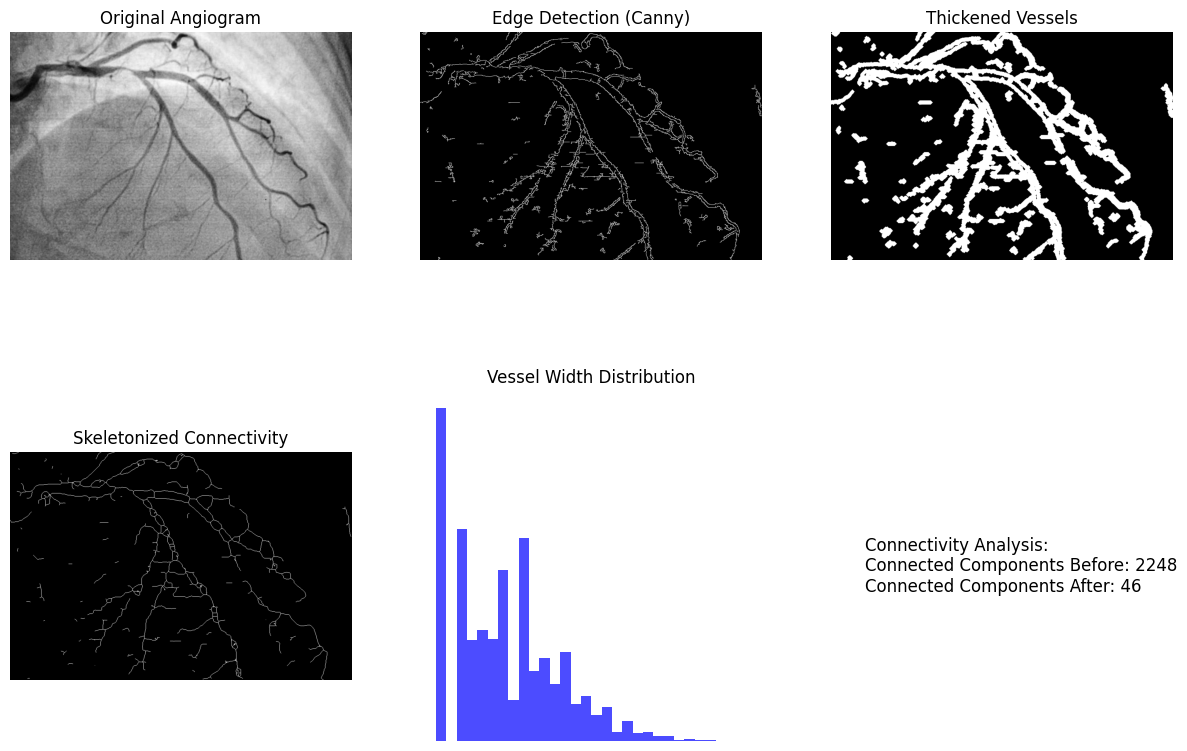

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize, binary_dilation, disk, remove_small_objects
from skimage.filters import threshold_otsu
from scipy.ndimage import distance_transform_edt, label

# Load the angiogram image (JPG)
image_path = '/home/student/Downloads/Angiography.jpg'  # Change this to your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Step 1: Edge Detection (Canny)
edges = cv2.Canny(image, 50, 150)

# Step 2: Convert edges to binary format
binary_edges = edges > 0

# Step 3: Morphological Thickening Iteratively
thickened = binary_edges.copy()
for _ in range(5):  # Increase iterations for more thickening
    thickened = binary_dilation(thickened, disk(1))

# Step 4: Connectivity Analysis (Skeletonization)
skeleton = skeletonize(thickened)

# Step 5: Vessel Width Estimation using Distance Transform
distance_transform = distance_transform_edt(thickened)
vessel_widths = distance_transform[thickened > 0] * 2  # Convert radius to width

# Step 6: Connectivity Evaluation (Connected Components)
def count_connected_components(binary_image):
    labeled_array, num_features = label(binary_image)
    return num_features

# Count connected components before and after thickening
components_before = count_connected_components(binary_edges)
components_after = count_connected_components(thickened)

# Display Results
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

ax[0, 0].imshow(image, cmap='gray')
ax[0, 0].set_title("Original Angiogram")

ax[0, 1].imshow(edges, cmap='gray')
ax[0, 1].set_title("Edge Detection (Canny)")

ax[0, 2].imshow(thickened, cmap='gray')
ax[0, 2].set_title("Thickened Vessels")

ax[1, 0].imshow(skeleton, cmap='gray')
ax[1, 0].set_title("Skeletonized Connectivity")

ax[1, 1].hist(vessel_widths, bins=30, color='blue', alpha=0.7)
ax[1, 1].set_title("Vessel Width Distribution")
ax[1, 1].set_xlabel("Width (pixels)")
ax[1, 1].set_ylabel("Frequency")

ax[1, 2].axis("off")
ax[1, 2].text(0.1, 0.5, 
              f"Connectivity Analysis:\n"
              f"Connected Components Before: {components_before}\n"
              f"Connected Components After: {components_after}",
              fontsize=12, verticalalignment="center")

for a in ax.flatten():
    a.axis("off")

plt.show()


In [ ]:
'''    2. Fill missing regions in satellite images using adaptive techniques.
    • Select satellite images with cloud-covered or missing areas.
    • Implement adaptive region filling using texture synthesis and interpolation.
    • Compare results using different structuring elements.
    • Evaluate the performance using terrain similarity metrics.
    • Region filling, cloudy satellite image,region filling based on neighbours'''

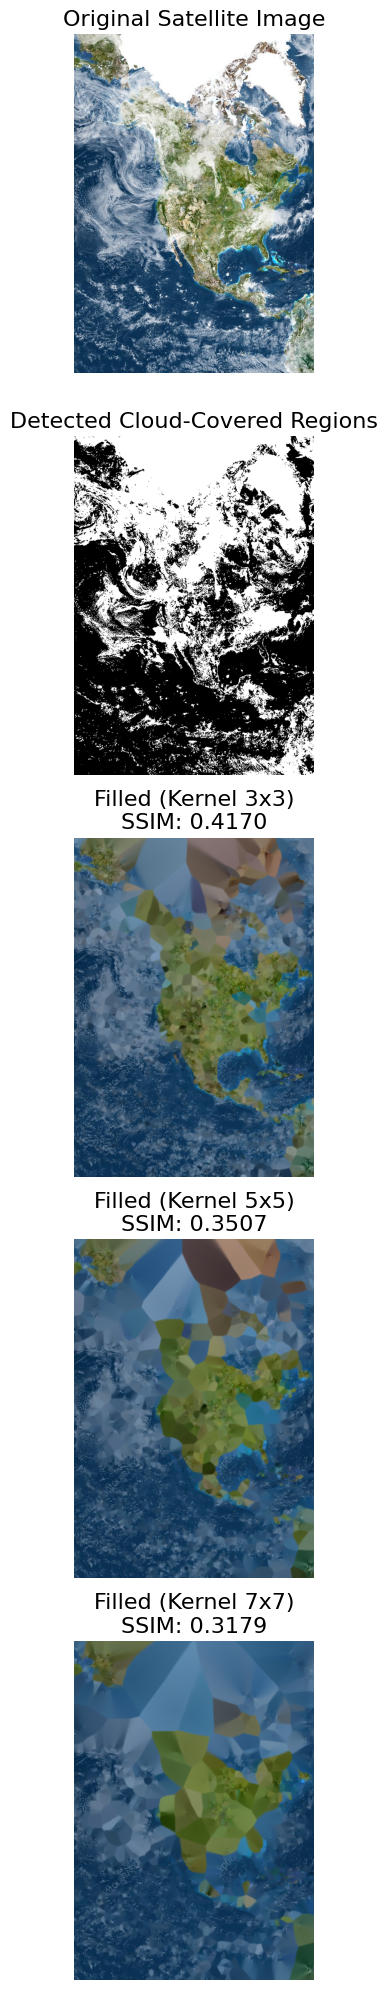

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import inpaint
from skimage.metrics import structural_similarity as ssim

# Step 1: Load the satellite image (with cloud-covered or missing areas)
image_path = '/home/student/Downloads/cloudsatellite.jpg'# Change to your image path
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 2: Detect Cloud-Covered or Missing Regions Using Otsu's Thresholding
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
_, cloud_mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cloud_mask = cloud_mask == 255  # Convert to boolean mask

# Step 3: Apply Adaptive Region Filling Using Texture Synthesis (PatchMatch)
filled_patchmatch = cv2.inpaint(image, cloud_mask.astype(np.uint8) * 255, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

# Step 4: Compare Results Using Different Structuring Elements
kernel_sizes = [3, 5, 7]  # Different structuring elements
filled_variants = {}
ssim_scores = {}

for size in kernel_sizes:
    kernel = np.ones((size, size), np.uint8)
    cloud_mask_dilated = cv2.dilate(cloud_mask.astype(np.uint8), kernel, iterations=1)
    filled_variants[size] = cv2.inpaint(image, cloud_mask_dilated * 255, inpaintRadius=3, flags=cv2.INPAINT_TELEA)
    
    # Compute SSIM similarity
    gray_original = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    gray_filled = cv2.cvtColor(filled_variants[size], cv2.COLOR_RGB2GRAY)
    ssim_scores[size] = ssim(gray_original, gray_filled)

# Step 5: Display Comparative Analysis with Larger Images in a Single Column
fig, ax = plt.subplots(len(kernel_sizes) + 2, 1, figsize=(12, 20))

# Display original image
ax[0].imshow(image)
ax[0].set_title("Original Satellite Image", fontsize=16)
ax[0].axis("off")

# Display detected cloud regions
ax[1].imshow(cloud_mask, cmap='gray')
ax[1].set_title("Detected Cloud-Covered Regions", fontsize=16)
ax[1].axis("off")

# Display region-filled images using different structuring elements
for idx, size in enumerate(kernel_sizes):
    ax[idx + 2].imshow(filled_variants[size])
    ax[idx + 2].set_title(f"Filled (Kernel {size}x{size})\nSSIM: {ssim_scores[size]:.4f}", fontsize=16)
    ax[idx + 2].axis("off")

plt.tight_layout()
plt.show()


In [ ]:
'''    3. Use skeletonization to preprocess handwritten text for OCR systems.
    • Use a dataset of handwritten characters.
    • Apply skeletonization to reduce characters to a single-pixel width structure.
    • Extract keypoints and compare with template matching.
    • Evaluate performance improvements in OCR accuracy.
    • Find skelletons'''

Epoch 1/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1273 - accuracy: 0.9615 - val_loss: 0.0491 - val_accuracy: 0.9846
Epoch 2/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0405 - accuracy: 0.9872 - val_loss: 0.0339 - val_accuracy: 0.9881
Epoch 3/3
1/1 [==============================] - 0s 33ms/step


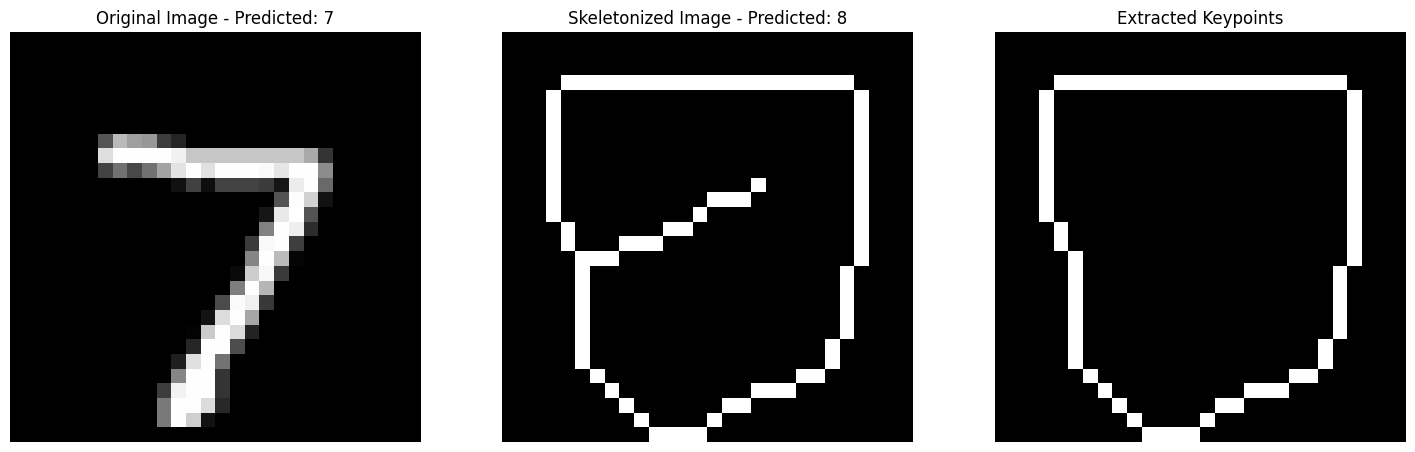

Structural Similarity Index (Before vs After Skeletonization): 0.02299241705199819


In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize
from skimage.metrics import structural_similarity as ssim
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Step 1: Load MNIST Handwritten Characters Dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize images
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshape for CNN input
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# One-hot encode labels
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Step 2: Train a Simple CNN for OCR
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=3, validation_data=(test_images, test_labels))

# Step 3: Apply Skeletonization on a Sample Image
sample_index = 0
original_image = test_images[sample_index].reshape(28, 28)
_, binary = cv2.threshold((original_image * 255).astype(np.uint8), 127, 255, cv2.THRESH_BINARY_INV)
skeleton = skeletonize(binary // 255)
skeleton = (skeleton * 255).astype(np.uint8)

# Step 4: Extract Keypoints (Contours)
contours, _ = cv2.findContours(skeleton, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
keypoints = cv2.drawContours(np.zeros_like(skeleton), contours, -1, (255, 255, 255), 1)

# Step 5: OCR Accuracy Before and After Skeletonization
original_prediction = np.argmax(model.predict(original_image.reshape(1, 28, 28, 1)))
skeleton_prediction = np.argmax(model.predict(skeleton.reshape(1, 28, 28, 1)))

# Step 6: Compute Structural Similarity Index (SSIM)
ssim_score = ssim(binary, skeleton)

# Step 7: Display Results
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].imshow(original_image, cmap='gray')
ax[0].set_title(f"Original Image - Predicted: {original_prediction}")
ax[0].axis("off")

ax[1].imshow(skeleton, cmap='gray')
ax[1].set_title(f"Skeletonized Image - Predicted: {skeleton_prediction}")
ax[1].axis("off")

ax[2].imshow(keypoints, cmap='gray')
ax[2].set_title("Extracted Keypoints")
ax[2].axis("off")

plt.show()

# Step 8: Print Structural Similarity Index
print("Structural Similarity Index (Before vs After Skeletonization):", ssim_score)